In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


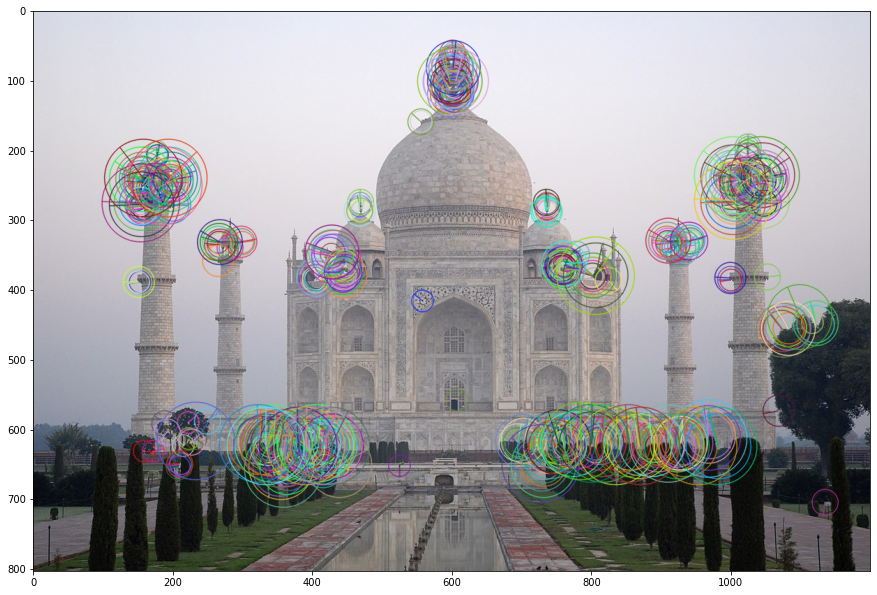

In [3]:
img = cv2.imread('data/Taj_Mahal_in_India_-_Kristian_Bertel.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
orb = cv2.ORB_create()
key_points, desc = orb.detectAndCompute(img, None)
img_key_points = cv2.drawKeypoints(img, key_points, img, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(15,15))
plt.imshow(img_key_points)
plt.show()

In [4]:
def img_detect_and_compute(detector, img_name):
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    key_points, desc = detector.detectAndCompute(img, None)
    return img, key_points, desc

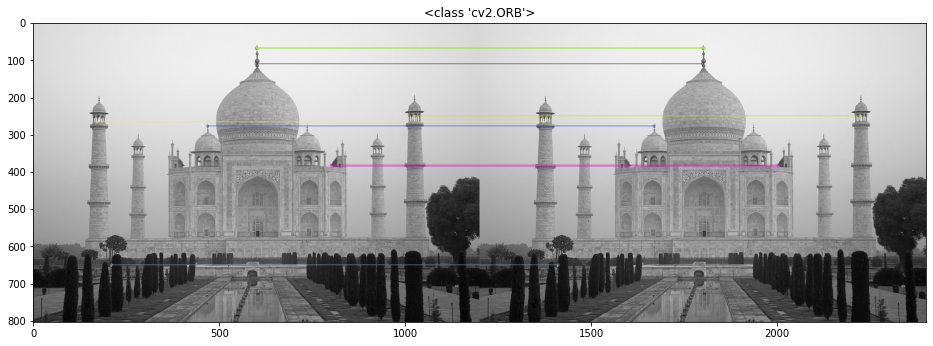

In [9]:
def image_detect_and_compute(detector, img_name):
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des = detector.detectAndCompute(img, None)
    return img, kp, des
    

def draw_image_matches(detector, img1_name, img2_name, nmatches=10):

    img1, kp1, des1 = image_detect_and_compute(detector, img1_name)
    img2, kp2, des2 = image_detect_and_compute(detector, img2_name)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance) # Sort matches by distance.  Best come first.
    
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:nmatches], img2, flags=2) # Show top 10 matches
    plt.figure(figsize=(16, 16))
    plt.title(type(detector))
    plt.imshow(img_matches)
    plt.show()
    

orb = cv2.ORB_create()
draw_image_matches(orb, 'data/Taj_Mahal_in_India_-_Kristian_Bertel.jpg', 'data/Taj_Mahal_in_India_-_Kristian_Bertel.jpg')

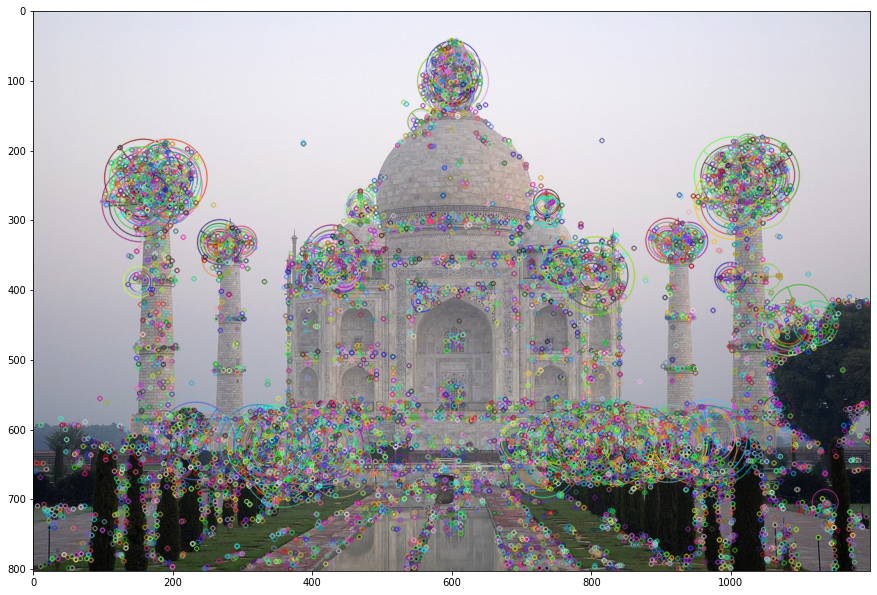

In [13]:
sift = cv2.xfeatures2d.SIFT_create()
key_points, des = sift.detectAndCompute(img, None)
img_kp = cv2.drawKeypoints(img, key_points, img)

plt.figure(figsize=(15, 15))
plt.imshow(img_kp)
plt.show()